In [7]:
# Importing tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.read_excel('predict_energy_consumption.xlsx')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [11]:
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [12]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [13]:
data.describe()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [14]:
data.shape

(1000, 5)

In [15]:
data.isnull().sum()

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64

In [16]:
data.isnull().sum().sum()

0

In [17]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values 
y = data['energy_consumption'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#Mean squared error and mean absolute error 

In [22]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92268.0938 - mae: 275.6541 - val_loss: 83592.2344 - val_mae: 258.7950
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88025.5625 - mae: 265.9334 - val_loss: 82902.8984 - val_mae: 257.4536
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89138.0859 - mae: 269.0652 - val_loss: 81864.0469 - val_mae: 255.4148
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86160.6797 - mae: 263.1644 - val_loss: 80328.7969 - val_mae: 252.3708
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87588.4531 - mae: 268.0603 - val_loss: 78119.2500 - val_mae: 247.9213
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81123.9688 - mae: 254.1813 - val_loss: 75078.9766 - val_mae: 241.6606
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 81071.0234 - mae: 254.6845 - val_loss: 71081.4844 - val_mae: 233.1641
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77981.2422 - mae: 246.9911 - val_loss: 66049.1

In [23]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18033.9180 - mae: 115.4408 
Test Mean Absolute Error: 115.73


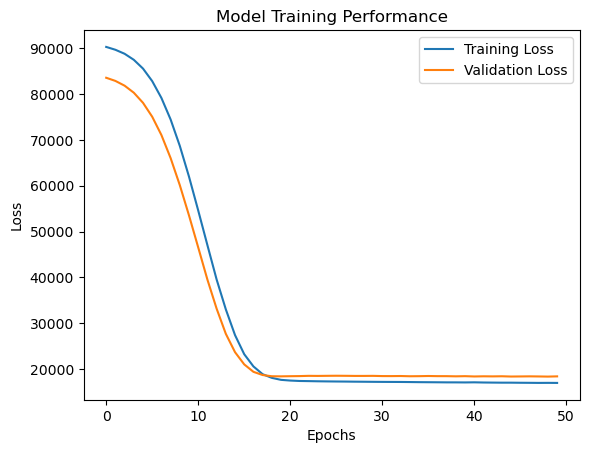

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [25]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[280.83878],
       [241.35928],
       [257.14163],
       [208.419  ],
       [353.4313 ],
       [294.3262 ],
       [318.63455],
       [277.35257],
       [291.2032 ],
       [287.3492 ],
       [239.4901 ],
       [244.55247],
       [281.68246],
       [234.1264 ],
       [302.5207 ],
       [316.28275],
       [268.57565],
       [300.83524],
       [306.25143],
       [249.42268],
       [278.3944 ],
       [287.11288],
       [282.96188],
       [280.4915 ],
       [248.59354],
       [247.17795],
       [267.8198 ],
       [319.1735 ],
       [319.57437],
       [259.76456],
       [233.98776],
       [305.13657],
       [300.37177],
       [276.80457],
       [314.66623],
       [290.9465 ],
       [215.28986],
       [264.24426],
       [289.2709 ],
       [240.4089 ],
       [247.1007 ],
       [249.37933],
       [254.77417],
       [259.5134 ],
       [269.69534],
       [262.48624],
       [262.8336 ],
       [260.7346 ],
       [294.78098],
       [292.14246],


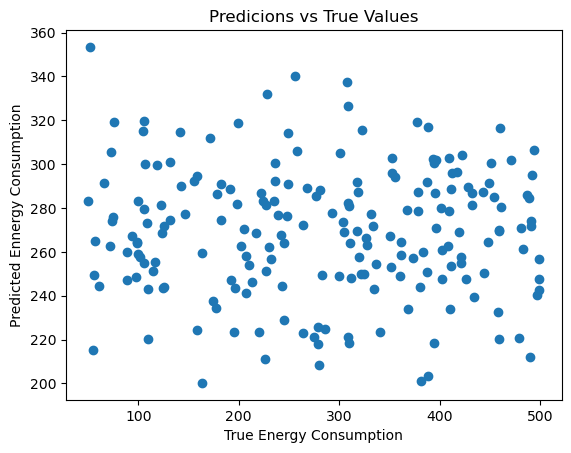

In [26]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Ennergy Consumption')
plt.title('Predicions vs True Values')
plt.show()